# Feature Engineering:
   Feature Engineering is the machine learning technique to extract features from the raw data. These features can be used to improve the performance of machine learning algorithms. Feature Engineering techniques may vary among data scientists and ML Engineers.

<img src="https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/6230e9ee021b250dd3710f8e_61ca4fbcc80819e696ba0ee9_Feature-Engineering-Machine-Learning-Diagram.png" width="650" height="650">

## Different Feature Engineering Techniques:
- Feature Transformation
    - Data Imputation
    - Handling Categorical Features
    - Outlier Detection
    - Feature Scaling
- Feature Construction
- Feature Selection
- Feature Extraction

## 1. Feature Scaling: 
**↪** Feature Scaling is a method to normalize the range of independent variables or features of data. 

**↪** It is also known as **data normalization**.
### _Different Feature Scaling techniques:_
In ML, there are two commonly used scaling techniques:
- **Standardization**
- **Normalization**

#  ⅰ. Standardization:
Standardization, also known as **z-score Normalization**.

In Stanardization, features after scaling have **`mean=0`** and **`Standard deviation=1`**.

$$
    Z = \frac{X - \bar{X}}{\sigma}
$$

In [ ]:
## Data Imputation is the first step of

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic', )
df = df[['age', 'fare', 'survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
df['age'] = df['age'].fillna(df['age'].mean())

### train_test_split

In [5]:
df.iloc[:, :2]

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [6]:
x = df.iloc[:,:2]
y = df['survived'] 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 2), (179, 2))

### Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the train data to standard scaler
scaler.fit(X_train)

# tranform the training data
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [10]:
x_train_scaled

,age,fare
0,-0.002824,-0.331679
1,0.096629,-0.426405
2,0.096629,0.102620
3,-0.744332,-0.555896
4,-0.667881,-0.491276
...,...,...
707,0.708237,1.023857
708,-0.820782,-0.479216
709,-0.002824,-0.481629
710,0.478884,-0.288681


In [11]:
df['age'].mean()
df['age'].std()

13.002015226002884

In [12]:
22.0 - 29.69911764705882 / 13.002015226002884

19.715806578378466

In [13]:
np.round(x_train_scaled.describe(),1)

,age,fare
count,712.0,712.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.2,-0.6
25%,-0.6,-0.5
50%,-0.0,-0.3
75%,0.4,-0.0
max,3.8,9.6


In [14]:
np.round(x_test_scaled.describe(),1)

,age,fare
count,179.0,179.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.2,-0.6
25%,-0.6,-0.5
50%,-0.0,-0.4
75%,0.3,-0.0
max,2.6,4.6


### Effect of Scaling

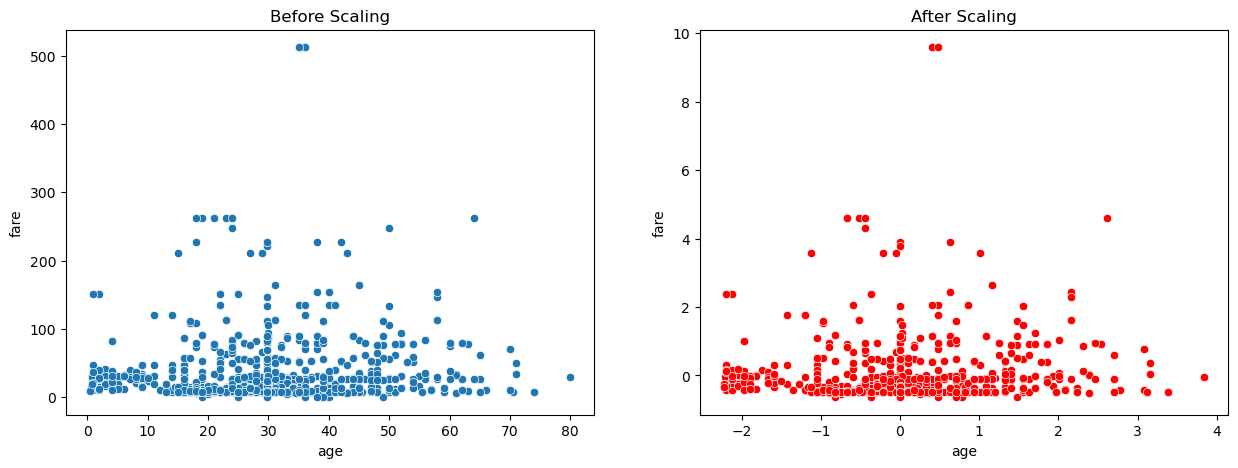

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=df['age'], y=df['fare'], ax=axes[0])
axes[0].set_title("Before Scaling")
sns.scatterplot(x=x_train_scaled['age'], y=x_train_scaled['fare'], ax=axes[1], color='red')
axes[1].set_title("After Scaling");

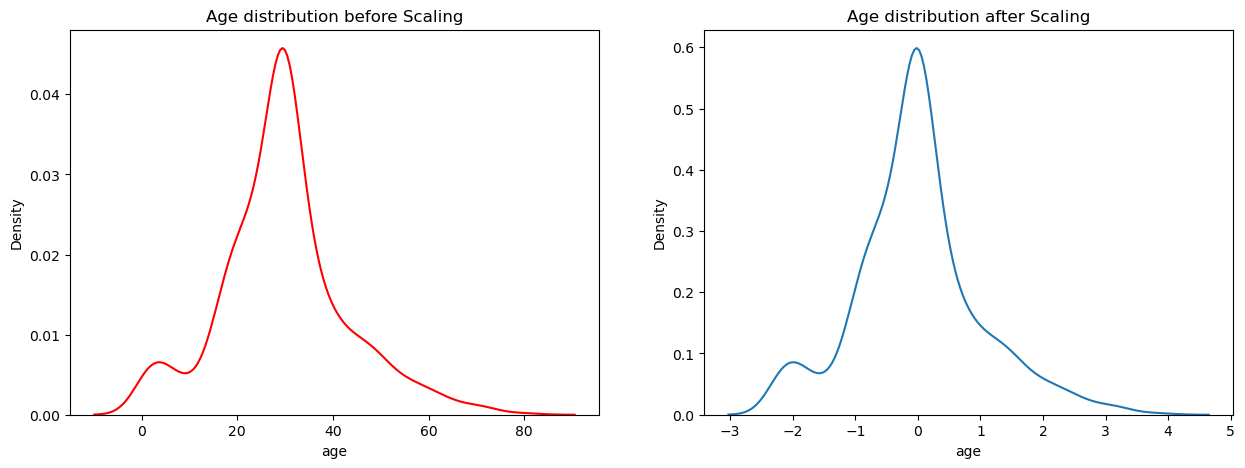

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(X_train['age'],ax=axes[0],color='red')
# sns.kdeplot(X_train['fare'], ax=axes[0], label='Fare')
axes[0].set_title("Age distribution before Scaling")

sns.kdeplot(x_train_scaled['age'], ax=axes[1])
# sns.kdeplot(x_train_scaled['fare'], ax=axes[1])
axes[1].set_title("Age distribution after Scaling");

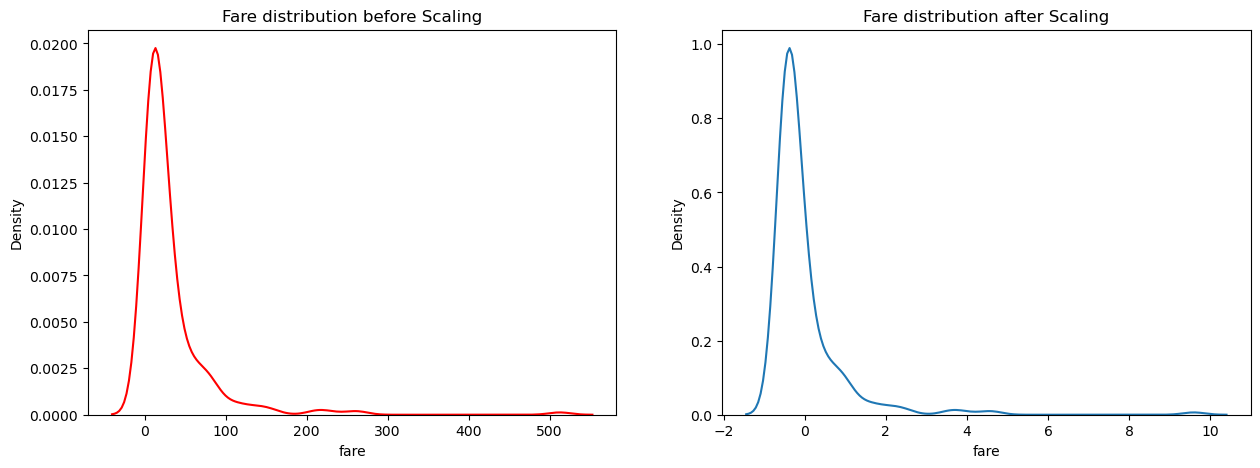

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(X_train['fare'], ax=axes[0],color='red')
axes[0].set_title("Fare distribution before Scaling")


sns.kdeplot(x_train_scaled['fare'], ax=axes[1])
axes[1].set_title("Fare distribution after Scaling");

# Why scaling is important?

- Scaling is necessary in Logistic Regression for better performance of model.

In [18]:
from sklearn.linear_model import LogisticRegression 


In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
# Fit the training data on LR
lr.fit(X_train, y_train)

# fit the scaled training data on LR
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [21]:
# prediction on training data
y_pred = lr.predict(X_test)

# prediction on testing data
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Accuracy of actual data: ", accuracy_score(y_test, y_pred))

# accuracy scaled data
print("Accuracy of scaled data: ", accuracy_score(y_test, y_pred_scaled))

Accuracy of actual data:  0.6983240223463687
Accuracy of actual data:  0.6927374301675978


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()
dtree_scaled = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train, y_train)

dtree_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [31]:
dt_pred = dtree.predict(X_test)

dt_pred_scaled = dtree_scaled.predict(x_test_scaled)

In [33]:
print("Accuracy on actual data: ", accuracy_score(y_test, dt_pred))

print("Accuracy on training data: ", accuracy_score(y_test, dt_pred_scaled))

Accuracy on actual data:  0.6759776536312849
Accuracy on training data:  0.6703910614525139


# ⅱ. Normalization:
**↪** The goal of normalization is to transform the values on a similar scale. 

**↪** Normalization is also known as **`min-max normalizarion`** or **`min-max scaling`**. 

**↪** Normalization re-scales values in the range of **`0-1`**.

**↪** Some methods for Normalization:
- Min-Max Scaling
- Mean Normalization
- Max Absoultue Scaling
- Robust Scaling


## **↪** Min-Max Scaling:

$$
    X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$